In [197]:
using DataFrames
using DataFramesMeta
using CSV


In [264]:
#df = CSV.read("\\\\trllimited\\data\\Vehicle_Validation_SCANNER\\Accreditation\\2023\\WDM\\RAV16\\Plates\\LONG-PM-NS-R1_R16_230302151337_S1_TEX.dat", DataFrame)
#df = CSV.read("\\Users\\royj\\development\\LONG-PM-NS-R1_R09_230302094024_S1_TEX.dat",DataFrame)
#df = CSV.read("\\\\trllimited\\data\\INF_TRACS\\TRACS5\\1 - Accreditation\\RAV17\\5-Accreditation-May23\\CC Output\\TRACS4\\Plates\\Texture\\RAV17_NS_Run_1_A.dat", DataFrame)
#df = CSV.read("\\\\trllimited\\data\\Vehicle_Validation_SCANNER\\Accreditation\\2023\\PTS\\MFV1 resubmission\\ProfileMats\\LONG-PM-NS-R2_rcd_AB1_tex.dat", DataFrame)
#df = CSV.read("\\\\trllimited\\data\\Vehicle_Validation_SCANNER\\Accreditation\\2023\\PTS\\MFV2 sumbission2\\ProfileMats\\LONG-PM-NS-R1_AB1_tex.dat", DataFrame)
#df = CSV.read("\\\\trllimited\\data\\Vehicle_Validation_SCANNER\\Accreditation\\2023\\PTS\\MFV2 sumbission2\\ProfileMats\\LONG-PM-NS-R1_AB1_tex.dat", DataFrame)
df = CSV.read("\\\\trllimited\\data\\Vehicle_Validation_SCANNER\\Accreditation\\2023\\G-L\\Tempest4\\PM_Long\\NS\\T4_20230524_094145_GLUK_RCD_L1AB_tex.dat", DataFrame)
#df = CSV.read("\\\\trllimited\\data\\Vehicle_Validation_SCANNER\\Accreditation\\2023\\G-L\\Tempest3\\PM_Long\\NS\\T3_20230524_094200_GLUK_RCD_tex.dat", DataFrame)

Row,Chainage,Texture,Dropout
,Float64,Float64,Int64
1,11.0009,14.9,0
2,11.0019,13.9,0
3,11.0029,12.8,0
4,11.0039,11.9,0
5,11.0049,11.8,0
6,11.0059,11.4,0
7,11.0069,11.5,0
8,11.0079,12.3,0
9,11.0089,13.5,0


In [265]:
minimum_texture = minimum(df.Texture)

adjustment_value = abs(minimum_texture)

#df.adjusted_Tex = df.Texture + adjustment_value
#df.adjusted_Tex = df.apply(lambda row: row.Texture + adjustment_value, axis=1)

readings_per_metre = length(df.Chainage) / maximum(df.Chainage)
println("readings per metre ", readings_per_metre)
hertz = readings_per_metre/2
println("hertz ", hertz)

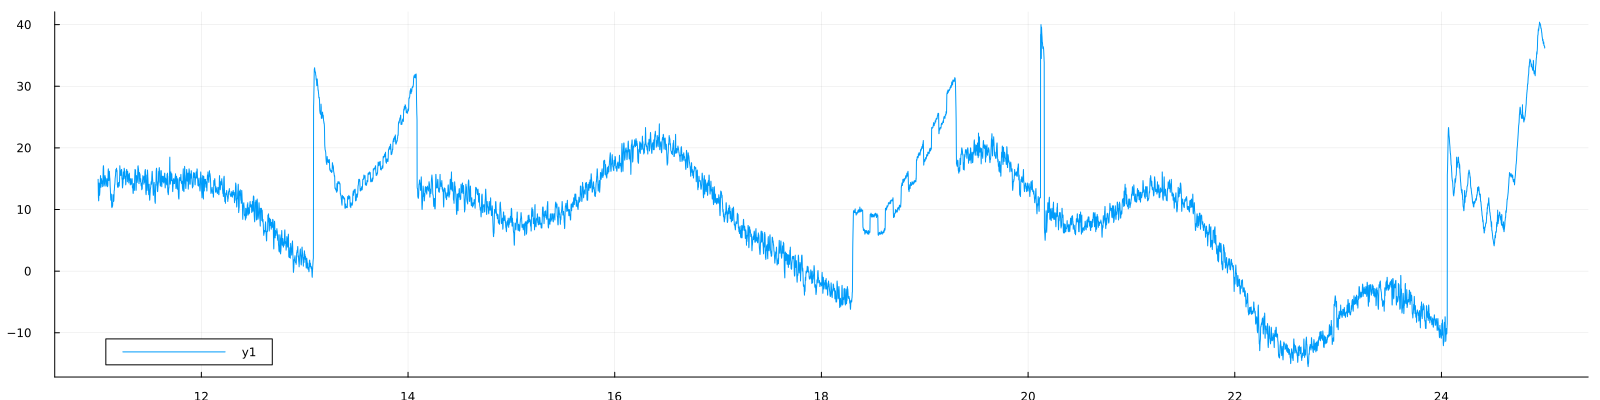

In [266]:
using Plots

#plotattr(size=(1200,400))
plot(df.Chainage
    , df.Texture
    , size=(1600,400))

In [267]:
# using DSP, Plots
# t = 1:1000; fs =2000; f0 = 60  # sampling and cutoff frequencies
# rawdata = df.Texture
# data_filt = filtfilt(digitalfilter(Lowpass(f0, fs=fs), Butterworth(1)), rawdata)
# plot(rawdata,label="input")
# plot!(data_filt, lc=:red, lw=2,label="filtered using filtfilt", size=(1600,400))

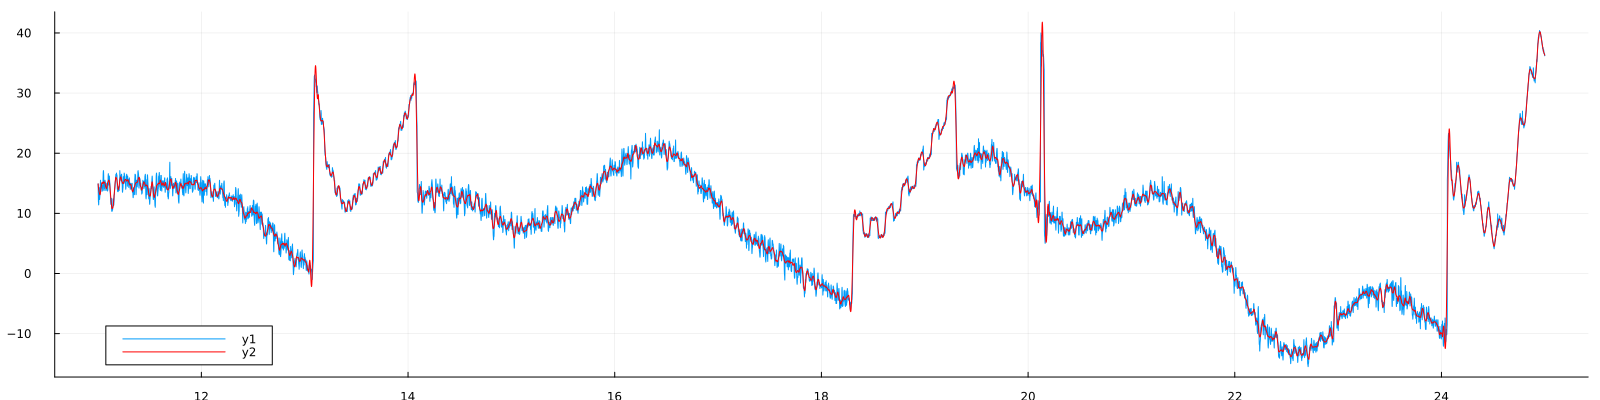

In [268]:
using SavitzkyGolay
using Plots
# from matplotlib import pyplot as plt
# import matplotlib as mpl
#sg = savitzky_golay(y::AbstractVector, window_size::Int, order::Int; deriv::Int=0, rate::Real=1.0)

sg = savitzky_golay(df.Texture, 99, 6) 

# print(len(df.Chainage))
# plt.subplots(figsize=(20,5))
# plt.plot(df.Chainage, df.Texture)
#plot(df.Chainage,[df.Texture,sg.y],size=(1600,400))
plot(df.Chainage,df.Texture,size=(1600,400))
plot!(df.Chainage, sg.y,lc=:red)

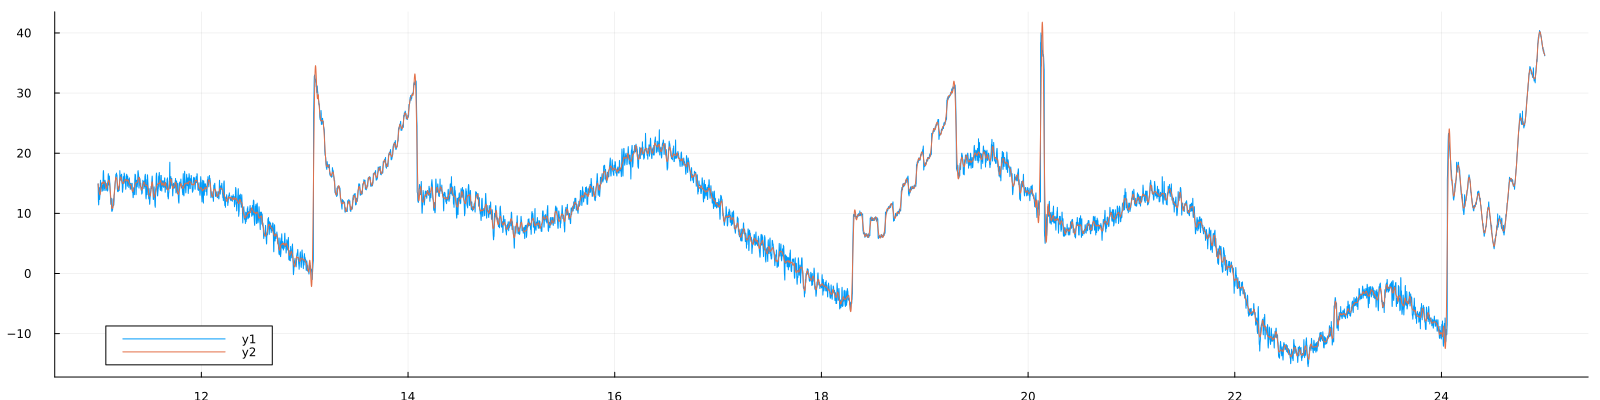

In [269]:
plot(df.Chainage,[df.Texture,sg.y],size=(1600,400))

In [270]:
filtered_tex = sg.y
df.sg = sg.y

14000-element Vector{Float64}:
 14.90000055102936
 14.688380899735343
 14.48810821638375
 14.305890372536457
 14.155863852674248
 14.032982266307782
 13.938869217470293
 13.848477461754442
 13.759209512214314
 13.657186901692025
  ⋮
 36.68808682736708
 36.63744514644633
 36.584024444637336
 36.53442980810609
 36.48195563981776
 36.43323781154009
 36.38463078121166
 36.34124481593264
 36.300000368403275

In [271]:
# Need to figure out where the input signal increases or decreases by a significant value, find the absolute change between the data readings.
# create abs_data_diff

using ShiftedArrays: lead
df_diff_calc = transform(df, :sg => (x -> x - lead(x,3)) => :data_diff)
transform!(df_diff_calc, :data_diff => (ByRow(x -> abs(x)) => :abs_data_diff))


Row,Chainage,Texture,Dropout,sg,data_diff,abs_data_diff
,Float64,Float64,Int64,Float64,Float64?,Float64?
1,11.0009,14.9,0,14.9,0.59411,0.59411
2,11.0019,13.9,0,14.6884,0.532517,0.532517
3,11.0029,12.8,0,14.4881,0.455126,0.455126
4,11.0039,11.9,0,14.3059,0.367021,0.367021
5,11.0049,11.8,0,14.1559,0.307386,0.307386
6,11.0059,11.4,0,14.033,0.273773,0.273773
7,11.0069,11.5,0,13.9389,0.281682,0.281682
8,11.0079,12.3,0,13.8485,0.298725,0.298725
9,11.0089,13.5,0,13.7592,0.30604,0.30604


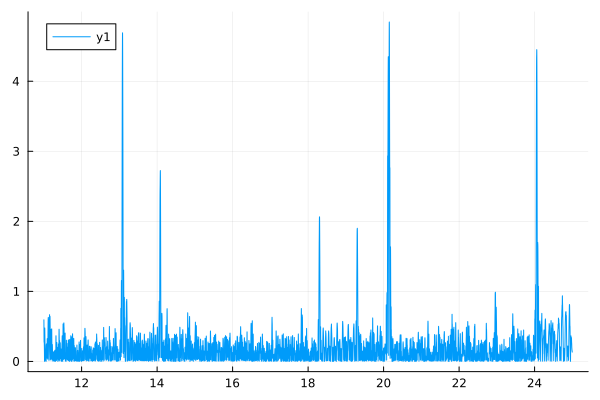

In [272]:
plot(df_diff_calc.Chainage, df_diff_calc.abs_data_diff)


In [273]:
threshold = 1.5  # Given threshold
exceed_points = Int[]
@transform!(df_diff_calc, :abs_data_diff = replace(:abs_data_diff, missing => 1))
prev_val = df_diff_calc[1, :abs_data_diff]

for i in 1:5:length(df_diff_calc[!,:abs_data_diff])
    
    current_val = df_diff_calc[i, :abs_data_diff]

    if current_val > threshold
        push!(exceed_points, i)
    end

end

println("Points at which the difference in values exceeds $threshold: are $exceed_points")

In [274]:
#println(exceed_points)

plate_boundaries = []
differences = diff(exceed_points)
#plate_start = exceed_points[1]

for i in 1:length(differences)
    if differences[i] > 90 && differences[i] <= 1100
        push!(plate_boundaries, exceed_points[i])
        push!(plate_boundaries, exceed_points[i+1])
        #plate_start=0
    end
end

print(plate_boundaries)

In [275]:

plate1 = df_diff_calc[plate_boundaries[1]:plate_boundaries[2],:]

# plot(plate1.Chainage, plate1.Texture)

Row,Chainage,Texture,Dropout,sg,data_diff,abs_data_diff
,Float64,Float64,Int64,Float64,Float64?,Float64
1,13.0959,33.0,0,30.4211,-2.41632,2.41632
2,13.0969,32.8,0,31.3363,-2.07543,2.07543
3,13.0979,32.6,0,32.1427,-1.70937,1.70937
4,13.0989,32.5,0,32.8374,-1.34015,1.34015
5,13.0999,32.5,0,33.4117,-0.983359,0.983359
6,13.1009,32.3,0,33.8521,-0.674235,0.674235
7,13.1019,32.3,0,34.1776,-0.384531,0.384531
8,13.1029,32.3,0,34.3951,-0.112084,0.112084
9,13.1039,32.3,0,34.5263,0.162052,0.162052


In [276]:
plate2 = df_diff_calc[plate_boundaries[3]:plate_boundaries[4],:]

# plot(plate2.Chainage, plate2.Texture)

Row,Chainage,Texture,Dropout,sg,data_diff,abs_data_diff
,Float64,Float64,Int64,Float64,Float64?,Float64
1,18.3059,6.4,0,4.39477,-1.92471,1.92471
2,18.3069,7.1,0,5.06394,-1.82768,1.82768
3,18.3079,8.0,0,5.70823,-1.72322,1.72322
4,18.3089,8.9,0,6.31948,-1.61292,1.61292
5,18.3099,9.6,0,6.89163,-1.50395,1.50395
6,18.3109,9.8,0,7.43145,-1.37666,1.37666
7,18.3119,9.8,0,7.9324,-1.25348,1.25348
8,18.3129,9.7,0,8.39558,-1.11793,1.11793
9,18.3139,9.7,0,8.80811,-0.99472,0.99472


In [277]:
plate3 = df_diff_calc[plate_boundaries[5]:plate_boundaries[6],:]

# plot(plate3.Chainage, plate3.Texture)

Row,Chainage,Texture,Dropout,sg,data_diff,abs_data_diff
,Float64,Float64,Int64,Float64,Float64?,Float64
1,19.3059,19.3,0,22.4687,1.85247,1.85247
2,19.3069,17.4,0,21.8396,1.79306,1.79306
3,19.3079,17.6,0,21.2193,1.70939,1.70939
4,19.3089,17.5,0,20.6162,1.60591,1.60591
5,19.3099,17.2,0,20.0466,1.51136,1.51136
6,19.3109,17.2,0,19.5099,1.41492,1.41492
7,19.3119,17.2,0,19.0103,1.32236,1.32236
8,19.3129,17.1,0,18.5352,1.21666,1.21666
9,19.3139,17.0,0,18.095,1.10678,1.10678


In [279]:
using Statistics
using CurveFit

function texture_plate_analysis(plate, poly_const)

    #using CurveFit
    #using Statistics

    poly = curve_fit(Polynomial, plate.Chainage, plate.Texture, poly_const)
    plate.basepoly = poly.(plate.Chainage)

    plate.corrected = plate.Texture - plate.basepoly

    #plot(plate1.Chainage, plate.Texture)
    #plot!(plate1.Chainage, plate.basepoly)
    #plot!(plate1.Chainage, plate.corrected)

    plate_average = mean(plate.corrected)
    #println(plate_average)

    #calculate the mean values of the corrected values above the mean

    mean_above_average = mean(plate[plate[!,:corrected].>plate_average,:].corrected)
    #println(mean_above_average)

    mean_below_average = mean(plate[plate[!,:corrected].<plate_average,:].corrected)
    #println(mean_below_average)

    mean_plate_height = diff([mean_above_average,mean_below_average])

    #return abs(mean_plate_height[1])
    plate_average = mean(plate1.corrected)

    #println(plate_average)
    #calculate the mean values of the corrected values above the mean
    
    mean_above_average = mean(plate[plate[!,:corrected].>plate_average,:].corrected)
    
    mean_below_average = mean(plate[plate[!,:corrected].<plate_average,:].corrected)
    #println(mean_below_average)
    
    # Calculate the number of rows for the middle 90%
    n_rows = nrow(plate)
    start_idx = Int(round(0.1 * n_rows))
    end_idx = Int(round(0.9 * n_rows))

    # Select the middle 90% of the rows as the poly line trends dont work at the ends of the range !
    middle_90_percent_df = plate[start_idx:end_idx, :]

    middle_average = mean(middle_90_percent_df.corrected)
    middle_mean_above_average = mean(middle_90_percent_df[middle_90_percent_df[!,:corrected].>middle_average,:].corrected)
    middle_mean_below_average = mean(middle_90_percent_df[middle_90_percent_df[!,:corrected].<middle_average,:].corrected)

    #println(plate_average, " ave ", mean_above_average, " mean_above_average ", mean_below_average, " below avg")

    #println("difference ", diff([mean_above_average, mean_below_average]))

    #println(middle_average, " ave ", middle_mean_above_average, " middle_mean_above_average ", middle_mean_below_average, " middle below avg")

    plate_pattern_height = diff([middle_mean_above_average, middle_mean_below_average]) # abs(mean_plate_height[1])
    println("Height ", diff([middle_mean_above_average, middle_mean_below_average]))
    flush(stdout)

    passes_through_zero = []

    for i in 1:(nrow(middle_90_percent_df)-1)
        first_val = middle_90_percent_df[i, :corrected]
        second_val = middle_90_percent_df[i+1, :corrected]
        if (first_val>middle_average) & (second_val< middle_average) ||
            (first_val<middle_average) &(second_val>middle_average)
            append!(passes_through_zero, i)
        end
    end

    #make sure that the values passign through zero are at least 4 apart. This means any noise does not affect the readings
    filtered_passes_through_zero = []
    for i in 1:(length(passes_through_zero) - 1)
        if (passes_through_zero[i+1] - passes_through_zero[i]) > 4
            push!(filtered_passes_through_zero, passes_through_zero[i])
            #
        end
    end

    #println(passes_through_zero)

    #println(diff(passes_through_zero))
    plate_pattern_length = mean(diff(filtered_passes_through_zero))

    #println("Length ", plate_pattern_length)
    #flush(stdout)

    return (abs(plate_pattern_height[1]) *2), (plate_pattern_length *2) #, filtered_passes_through_zero

end


texture_plate_analysis (generic function with 1 method)

In [280]:
# plate1_height, plate1_length = texture_plate_analysis(plate1,14)

# print(plate1_height, " ", plate1_length)
# flush(stderr)

In [302]:
# using Statistics
# using CurveFit

# function texture_plate_analysis(plate, poly_const)

#     #using CurveFit
#     #using Statistics

#     poly = curve_fit(Polynomial, plate.Chainage, plate.Texture, poly_const)
#     plate.basepoly = poly.(plate.Chainage)

#     plate.corrected = plate.Texture - plate.basepoly

#     #plot(plate1.Chainage, plate.Texture)
#     #plot!(plate1.Chainage, plate.basepoly)
#     #plot!(plate1.Chainage, plate.corrected)

#     plate_average = mean(plate.corrected)
#     #println(plate_average)

#     #calculate the mean values of the corrected values above the mean

#     mean_above_average = mean(plate[plate[!,:corrected].>plate_average,:].corrected)
#     #println(mean_above_average)

#     mean_below_average = mean(plate[plate[!,:corrected].<plate_average,:].corrected)
#     #println(mean_below_average)

#     mean_plate_height = diff([mean_above_average,mean_below_average])

#     #return abs(mean_plate_height[1])
#     plate_average = mean(plate1.corrected)

#     #println(plate_average)
#     #calculate the mean values of the corrected values above the mean
    
#     mean_above_average = mean(plate[plate[!,:corrected].>plate_average,:].corrected)
    
#     mean_below_average = mean(plate[plate[!,:corrected].<plate_average,:].corrected)
#     #println(mean_below_average)
    
#     # Calculate the number of rows for the middle 90%
#     n_rows = nrow(plate)
#     start_idx = Int(round(0.1 * n_rows))
#     end_idx = Int(round(0.9 * n_rows))

#     # Select the middle 90% of the rows as the poly line trends dont work at the ends of the range !
#     middle_90_percent_df = plate[start_idx:end_idx, :]

#     middle_average = mean(middle_90_percent_df.corrected)
#     middle_mean_above_average = mean(middle_90_percent_df[middle_90_percent_df[!,:corrected].>middle_average,:].corrected)
#     middle_mean_below_average = mean(middle_90_percent_df[middle_90_percent_df[!,:corrected].<middle_average,:].corrected)

#     #println(plate_average, " ave ", mean_above_average, " mean_above_average ", mean_below_average, " below avg")

#     #println("difference ", diff([mean_above_average, mean_below_average]))

#     #println(middle_average, " ave ", middle_mean_above_average, " middle_mean_above_average ", middle_mean_below_average, " middle below avg")

#     plate_pattern_height = diff([middle_mean_above_average, middle_mean_below_average]) # abs(mean_plate_height[1])
#     println("Height ", diff([middle_mean_above_average, middle_mean_below_average]))
#     flush(stdout)

#     passes_through_zero = []

#     for i in 1:(nrow(middle_90_percent_df)-1)
#         first_val = middle_90_percent_df[i, :corrected]
#         second_val = middle_90_percent_df[i+1, :corrected]
#         if (first_val>middle_average) & (second_val< middle_average) ||
#             (first_val<middle_average) &(second_val>middle_average)
#             append!(passes_through_zero, i)
#         end
#     end

#     #make sure that the values passign through zero are at least 4 apart. This means any noise does not affect the readings
#     filtered_passes_through_zero = []
#     for i in 1:(length(passes_through_zero) - 1)
#         if (passes_through_zero[i+1] - passes_through_zero[i]) > 10
#             push!(filtered_passes_through_zero, passes_through_zero[i])
#             #
#         end
#     end

#     #println(passes_through_zero)

#     #println(diff(passes_through_zero))
#     plate_pattern_length = mean(diff(filtered_passes_through_zero))

#     #println("Length ", plate_pattern_length)
#     #flush(stdout)

#     return (abs(plate_pattern_height[1]) *2), (plate_pattern_length *2), filtered_passes_through_zero

# end


In [282]:
plate1_height, plate1_length = texture_plate_analysis(plate1,14)

plate2_height, plate2_length = texture_plate_analysis(plate2,14)

plate3_height, plate3_length= texture_plate_analysis(plate3,14)

#println(plate1_height, plate1_length)
# flush(stdout)

# println(plate2_height, plate2_length)
# flush(stdout)

# println(plate3_height, plate3_length)
# flush(stdout)

(3.3188316329517606, 56.0, Any[4, 25, 37, 62, 89, 166, 179, 238, 256, 274  …  358, 384, 418, 441, 461, 493, 530, 551, 576, 592])

In [283]:
# plate3_height = texture_plate_analysis(plate3,14)

# # as this is the triangle plate double the height

# plate3_height = plate3_height * 2
# print(plate3_height)
# flush(stderr)

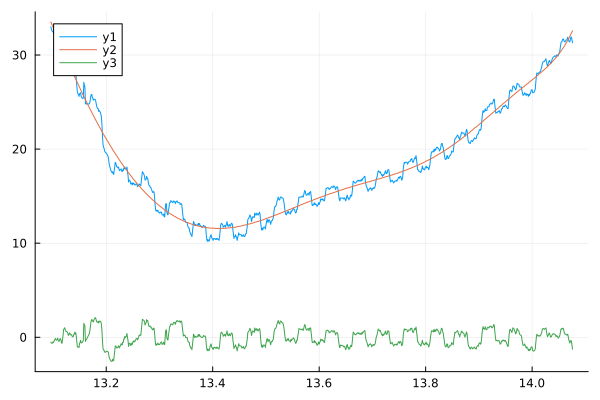

In [284]:
using CurveFit
poly = curve_fit(Polynomial, plate1.Chainage, plate1.Texture, 14)
plate1.basepoly = poly.(plate1.Chainage)

plate1.corrected = plate1.Texture - plate1.basepoly

plot(plate1.Chainage, plate1.Texture)
plot!(plate1.Chainage, plate1.basepoly)
#plot!(plate3.Chainage, plate3.baseexp)
plot!(plate1.Chainage, plate1.corrected)
#plot!(plate3.Chainage, plate3.expcorrected)

In [285]:
plate1_height, plate1_length = texture_plate_analysis(plate1,14)

plate2_height, plate2_length = texture_plate_analysis(plate2,14)

plate3_height, plate3_length= texture_plate_analysis(plate3,14)

#println(plate1_height, plate1_length)
# flush(stdout)

# println(plate2_height, plate2_length)
# flush(stdout)

# println(plate3_height, plate3_length)
# flush(stdout)

(3.3188316329517606, 56.0, Any[4, 25, 37, 62, 89, 166, 179, 238, 256, 274  …  358, 384, 418, 441, 461, 493, 530, 551, 576, 592])

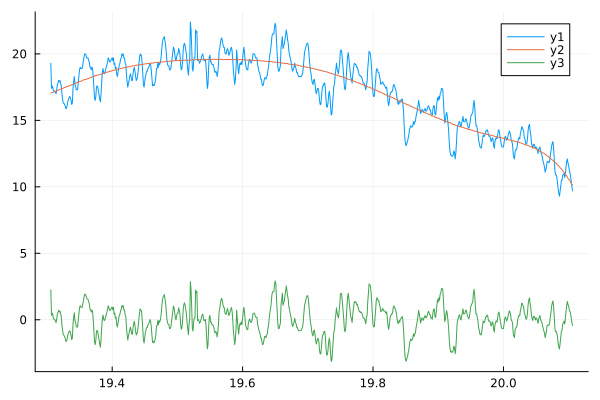

In [286]:
poly = curve_fit(Polynomial, plate3.Chainage, plate3.Texture, 14)
plate3.basepoly = poly.(plate3.Chainage)

plate3.corrected = plate3.Texture - plate3.basepoly

plot(plate3.Chainage, plate3.Texture)
plot!(plate3.Chainage, plate3.basepoly)
#plot!(plate3.Chainage, plate3.baseexp)
plot!(plate3.Chainage, plate3.corrected)
#plot!(plate3.Chainage, plate3.expcorrected)

In [287]:
# # find the average of the corrected data
# using Statistics
# plate2_average = mean(plate2.corrected)
# println(plate2_average)
# flush(stdout)
# #calculate the mean values of the corrected values above the mean

# mean_above_average = mean(plate2[plate2[!,:corrected].>plate2_average,:].corrected)
# println(mean_above_average)
# flush(stdout)
# #plate1[plate1[!,:corrected].>plate1_average,:]
# mean_below_average = mean(plate2[plate2[!,:corrected].<plate2_average,:].corrected)
# print(mean_below_average)
# flush(stdout)

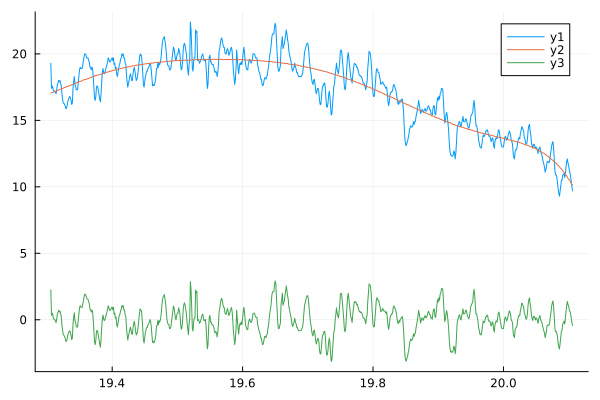

In [288]:
using CurveFit

poly = curve_fit(Polynomial, plate3.Chainage, plate3.Texture, 14)
plate3.basepoly = poly.(plate3.Chainage)

plate3.corrected = plate3.Texture - plate3.basepoly
#plate3.expcorrected = plate3.Texture - plate3.baseexp

plot(plate3.Chainage, plate3.Texture)
plot!(plate3.Chainage, plate3.basepoly)
#plot!(plate3.Chainage, plate3.baseexp)
plot!(plate3.Chainage, plate3.corrected)
#plot!(plate3.Chainage, plate3.expcorrected)

In [289]:
# using Statistics
# plate3_average = mean(plate3.corrected)
# println(plate3_average)
# flush(stdout)
# #calculate the mean values of the corrected values above the overall mean

# mean_above_average = mean(plate3[plate3[!,:corrected].>plate3_average,:].corrected)
# println(mean_above_average)
# flush(stdout)

# # and below mean
# #plate1[plate1[!,:corrected].>plate1_average,:]
# mean_below_average = mean(plate3[plate3[!,:corrected].<plate3_average,:].corrected)
# print(mean_below_average)
# flush(stdout)

# abs(diff([mean_above_average, mean_below_average])[1]*2)

In [290]:
# plate3_average

In [291]:
# mean_below_average

In [292]:
# @transform!(df_diff_calc, :abs_data_diff = replace(:abs_data_diff, missing => 1))

# df_diff_calc

In [293]:
# threshold = 1.5 # Given threshold
# exceed_points = [] # will be a list of rows near the edges of the plate.


# prev_val = df_diff_calc[1,:abs_data_diff]
# end_of_df = length(df_diff_calc[!,:abs_data_diff])
# println("end ",end_of_df)
# println("first previous ",prev_val)
# @transform(df_diff_calc, :abs_data_diff = replace(:abs_data_diff, missing => 0))
# #loop_range = range(1, 15, end_of_df)
# # outer loop means that only the row numbers vivisable by 15 are processed
# for i in 1:end_of_df
#   # current_val = df.iloc[i]['Texture'] 
#   if i % 12 == 0
#     #println("pos ", i)
  
#   #int_i = 
  
#   current_val = df_diff_calc[i, :abs_data_diff]
#   print(current_val)
#     if abs(current_val - prev_val) > threshold
#       append!(exceed_points, i)
#       #i= i + 700
#       prev_val = current_val
#     #
#     end
#   end
# end
# println("Points at which the difference in values exceeds $threshold are $exceed_points")

In [294]:
# threshold = 22 # Given threshold
# exceed_points = []

# prev_val = df[1,:Texture]
# end_of_df = length(df[!,:Texture])
# println("end ",end_of_df)
# println("first tex ",prev_val)
# #loop_range = range(1, 15, end_of_df)
# # outer loop means that only the row numbers vivisable by 15 are processed
# for i in 1:end_of_df
#   # current_val = df.iloc[i]['Texture'] 
#   if i % 12 == 0
#     #println("pos ", i)
  
#   #int_i = 
  
#   current_val = df[i, :Texture]
#     if abs(current_val - prev_val) > threshold
#       append!(exceed_points, i)
#       #i= i + 700
#       prev_val = current_val
#     #
#     end
#   end
# end
# println("Points at which the difference in values exceeds $threshold are $exceed_points")

In [295]:
# # return the rows where the difference is greater than a given value

# potential_plates = subset(df_diff_calc, :abs_data_diff => ByRow(abs_data_diff -> abs_data_diff > 2), skipmissing=true)
# #
# #textureΔ =
# #mapcols(data_diff -> df_diff_calc)

In [296]:
# #length_of_df = length(potential_plates[!,1])
# length_of_df = length(df_diff_calc[!,1])
# println(length_of_df)
# df_diff_calc.data_diff[ismissing.(df_diff_calc.data_diff)] .= 0

# # global df_diff_calc
# i=1
# # global plate_start =1
# # global plate_end= 2
# # global plate_position = 1

# while i <= length_of_df

#     println(i)
#     #plate_position = i
#     #plate_start=1
#     #plate_end=1
#     abs_data_diff = df_diff_calc[i,:abs_data_diff]
#     #int_data_diff: Float64 = df_diff_calc[i,:data_diff]
#     int_data_diff = df_diff_calc[i,:data_diff]
#     #println(plate_position) # , "DATA DIFF ",int_data_diff)

#     if ismissing(int_data_diff) int_data_diff = 0 end

#     print(int_data_diff)

#     if int_data_diff <= -2.0
#         plate_start = i
#         println("row ", i, " data_diff ",int_data_diff)
#         i = i + 800
#     # else
#     #     i+=1
#         #continue
#     end

    # if int_data_diff >= 2
    #     plate_end = i
    #     i =i +1000
    #     println( "start ", plate_start)
    #     println("End ", plate_end)
    # end
    global i +=1
    
end


ErrorException: syntax: unexpected "end"

In [297]:
# while i <= 3
#     println(i)
#     global i += 1
# end
# println(i)

In [298]:
# i=1

# while i <= 3
#     println(i)
#     global i += 1
# end
# println(i)

In [299]:
#length_of_df

In [300]:
#df_diff_calc

In [301]:
# # find the regression line for plate 1
# using GLM
# model = lm(@formula(Texture ~ 1 + Chainage + Chainage^2), plate1)  # Note how the formula looks exactly like the model you want to build
# plot(plate1.Chainage, predict(model, plate1), label="model")
# plot!(plate1.Chainage, plate1.Texture)

# plate1.baseline = predict(model,plate1)

# plate1.corrected = plate1.Texture - plate1.baseline

# plot!(plate1.Chainage, plate1.corrected)
